In [1]:
import numpy as np
import scipy
from numpy import mean, absolute
import pandas as pd
from sklearn import *

from scipy import spatial
from sklearn.metrics.pairwise import euclidean_distances
from scipy.spatial import distance
import math
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer
from itertools import chain
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from os import listdir
from pathlib import Path
from os.path import isfile, join
from natsort import natsorted ## !pip install natsort

In [2]:
xtrainFileName="xtrain_AWID_ChiSquare_reduced.npy"
xtestFileName="xtest_AWID_ChiSquare_reduced.npy"
ytrainFileName="ytrain_AWID_ChiSquare_reduced.npy"
ytestFileName="ytest_AWID_ChiSquare_reduced.npy"
X_train=np.load(xtrainFileName)
X_test=np.load(xtestFileName)
y_train=np.load(ytrainFileName)
y_test=np.load(ytestFileName)

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [4]:
scaler=StandardScaler().fit(X_train)
X_train_transformed=scaler.transform(X_train)
X_test_transformed=scaler.transform(X_test)

In [5]:
X_train_transformed

array([[-0.57244847, -0.83217363, -0.07427899, ..., -0.47002302,
        -0.97198544, -0.76613581],
       [-0.60199699, -0.01866551, -0.09213789, ..., -0.47002302,
        -0.97198544, -1.4083291 ],
       [-0.60199699,  0.04429943, -0.08009351, ..., -0.28251807,
        -0.97198544,  0.51825079],
       ...,
       [ 1.82754774, -0.64503608, -0.07012576, ...,  0.46750174,
         1.05597342,  1.01773447],
       [ 1.87679527, -0.79560333,  0.04035024, ...,  0.67844481,
         0.37998714,  1.08908928],
       [-0.45753757, -0.63329279, -0.04146845, ..., -0.28251807,
         1.05597342, -0.76613581]])

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import itertools
import matplotlib.pyplot as plt
from scipy.stats import mode
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV
import time

In [7]:
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier

In [8]:
from sklearn.preprocessing import OneHotEncoder

y_train_df = pd.DataFrame(y_train)
y_test_df = pd.DataFrame(y_test)

#onehotencoder1 = OneHotEncoder(categorical_features = [0])
#y_train = onehotencoder1.fit_transform(y_train).toarray()
#y_test = onehotencoder1.fit_transform(y_test).toarray()


#y_train.
#y_test.shape

In [9]:


encoder = OneHotEncoder(sparse=False)
y_train = encoder.fit_transform(y_train_df)
y_test = encoder.fit_transform(y_test_df)



In [10]:
y_train

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [11]:
import tensorflow as tf
keras = tf.keras  
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.optimizers import Adam
from keras.initializers import Constant
from keras.callbacks import LearningRateScheduler

In [12]:
model = Sequential()
model.add(Conv1D(filters=64,kernel_size=3,
    strides=1,activation='relu', padding = 'same', input_shape=(X_train.shape[1], 1),name='Input'))
model.add(Dense(128, input_dim=X_train.shape[1], name='Dense_0', 
                #kernel_initializer='he_uniform', 
                 activation='PReLU'))
model.add(MaxPooling1D(2))
model.add(Dense(64, activation='PReLU', name='Dense_1'))
model.add(Dense(32, activation='PReLU',name='Dense_2'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(y_train.shape[1], activation='softmax', name='Output'))


In [13]:
X_train_transformed = X_train_transformed[:, :, np.newaxis]
X_test_transformed = X_test_transformed[:, :, np.newaxis]

In [14]:
import math

k1=20
n1=X_train.shape[1]
n2=n1-k1+1
n3=4
k2=math.ceil(n2/n3)
n4=100

#model_name=(dataset+'_1DCNN')
model = Sequential()

model.add(Conv1D(k1, n2, activation='relu', padding = 'same', input_shape=(X_train.shape[1], 1)))
#model.add(layers.Conv1D(128, 5, activation='relu', padding = 'same'))
model.add(MaxPooling1D(n3))
model.add(Dense(n4, activation='relu'))
model.add(Flatten())
model.add(Dense(y_train.shape[1], activation='softmax'))

#model.add(layers.Conv1D(128, 5, activation='relu', padding = 'same'))
#model.add(layers.Conv1D(128, 5, activation='relu', padding = 'same'))
#model.add(layers.MaxPooling1D(2))
#
#model.add(layers.Flatten())
#
#model.add(layers.Dense(128, activation='relu'))
#model.add(layers.Dropout(0.5))
#model.add(layers.Dense(128, activation='relu'))
#model.add(layers.Dropout(0.5))
#model.add(layers.Dense(128, activation='relu'))
#model.add(layers.Dropout(0.5))
#
#model.add(layers.Dense(y_train.shape[1], activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 24, 20)            120       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 6, 20)             0         
_________________________________________________________________
dense (Dense)                (None, 6, 100)            2100      
_________________________________________________________________
flatten_1 (Flatten)          (None, 600)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 14)                8414      
Total params: 10,634
Trainable params: 10,634
Non-trainable params: 0
_________________________________________________________________


In [15]:
sd=[]
class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.losses = [1,1]

    def on_epoch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))
        sd.append(step_decay(len(self.losses)))
        print('lr:', step_decay(len(self.losses)))

In [16]:
#learning_rate = 0.1
#decay_rate = 5e-6
#momentum = 0.9
#epochs=100
from tensorflow.keras.callbacks import LearningRateScheduler, ModelCheckpoint, ReduceLROnPlateau

filepath='WNIDS_CNN_model_projec_2.hdf5'

reduce_lr = ReduceLROnPlateau(monitor="loss", factor=0.3, patience=50, verbose=1, cooldown=10, min_lr=1e-5)
lr_shceduler = LearningRateScheduler(lambda _, lr: lr * np.exp(-0.01), verbose=1)
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')


In [17]:
def step_decay(losses):
    if float(2*np.sqrt(np.array(history.losses[-1])))<0.3:
        lrate=0.01*1/(1+0.1*len(history.losses))
        momentum=0.8
        decay_rate=2e-6
        return lrate
    else:
        lrate=0.1
        return lrate

In [18]:
#history=LossHistory()
#lrate=LearningRateScheduler(step_decay)

In [19]:
callbacks = [reduce_lr, lr_shceduler,checkpoint]

In [20]:
# Adam optimizer with learning rate of 0.001
optimizer = Adam(lr=0.001)
#optimizer=Adam(lr=lr_schedule(0))
#optimizer='rmsprop'
model.compile(optimizer, 
              #loss='binary_crossentropy',
              loss='categorical_crossentropy', 
              #loss='mse', 
              metrics=['accuracy'])

print('Neural Network Model Summary: ')
print(model.summary())



Neural Network Model Summary: 
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 24, 20)            120       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 6, 20)             0         
_________________________________________________________________
dense (Dense)                (None, 6, 100)            2100      
_________________________________________________________________
flatten_1 (Flatten)          (None, 600)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 14)                8414      
Total params: 10,634
Trainable params: 10,634
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\abela\anaconda3\envs\tensorflow_env\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [21]:
# Train the model
start = time.time()
model_history=model.fit(X_train_transformed, y_train, 
          verbose=1, 
          batch_size=128, 
          epochs=100, 
          validation_split=0.1,
          callbacks=callbacks
          #validation_data=(X_test, y_test)
                       )
end = time.time()
print('Time elapsed: %.4f'%(end-start))


Epoch 1/100

Epoch 00001: LearningRateScheduler setting learning rate to 0.0009900498807740119.
11696/11696 [==============================] - 31s 2ms/step - loss: 0.0482 - accuracy: 0.9862 - val_loss: 0.0278 - val_accuracy: 0.9909

Epoch 00001: val_accuracy improved from -inf to 0.99094, saving model to WNIDS_CNN_model_projec_2.hdf5
Epoch 2/100

Epoch 00002: LearningRateScheduler setting learning rate to 0.0009801987522893801.
11696/11696 [==============================] - 23s 2ms/step - loss: 0.0245 - accuracy: 0.9918 - val_loss: 0.0232 - val_accuracy: 0.9924

Epoch 00002: val_accuracy improved from 0.99094 to 0.99239, saving model to WNIDS_CNN_model_projec_2.hdf5
Epoch 3/100

Epoch 00003: LearningRateScheduler setting learning rate to 0.0009704455922292659.
11696/11696 [==============================] - 23s 2ms/step - loss: 0.0210 - accuracy: 0.9928 - val_loss: 0.0193 - val_accuracy: 0.9932

Epoch 00003: val_accuracy improved from 0.99239 to 0.99323, saving model to WNIDS_CNN_model_

11696/11696 [==============================] - 27s 2ms/step - loss: 0.0121 - accuracy: 0.9958 - val_loss: 0.0116 - val_accuracy: 0.9962

Epoch 00027: val_accuracy improved from 0.99596 to 0.99618, saving model to WNIDS_CNN_model_projec_2.hdf5
Epoch 28/100

Epoch 00028: LearningRateScheduler setting learning rate to 0.0007557836924452804.
11696/11696 [==============================] - 27s 2ms/step - loss: 0.0120 - accuracy: 0.9958 - val_loss: 0.0114 - val_accuracy: 0.9961

Epoch 00028: val_accuracy did not improve from 0.99618
Epoch 29/100

Epoch 00029: LearningRateScheduler setting learning rate to 0.0007482635209223455.
11696/11696 [==============================] - 27s 2ms/step - loss: 0.0118 - accuracy: 0.9958 - val_loss: 0.0123 - val_accuracy: 0.9961

Epoch 00029: val_accuracy did not improve from 0.99618
Epoch 30/100

Epoch 00030: LearningRateScheduler setting learning rate to 0.0007408181511729539.
11696/11696 [==============================] - 28s 2ms/step - loss: 0.0118 - accur

11696/11696 [==============================] - 30s 3ms/step - loss: 0.0105 - accuracy: 0.9963 - val_loss: 0.0105 - val_accuracy: 0.9962

Epoch 00055: val_accuracy did not improve from 0.99631
Epoch 56/100

Epoch 00056: LearningRateScheduler setting learning rate to 0.0005712090484003258.
11696/11696 [==============================] - 29s 2ms/step - loss: 0.0105 - accuracy: 0.9963 - val_loss: 0.0111 - val_accuracy: 0.9961

Epoch 00056: val_accuracy did not improve from 0.99631
Epoch 57/100

Epoch 00057: LearningRateScheduler setting learning rate to 0.0005655254390661843.
11696/11696 [==============================] - 28s 2ms/step - loss: 0.0105 - accuracy: 0.9963 - val_loss: 0.0103 - val_accuracy: 0.9965

Epoch 00057: val_accuracy improved from 0.99631 to 0.99646, saving model to WNIDS_CNN_model_projec_2.hdf5
Epoch 58/100

Epoch 00058: LearningRateScheduler setting learning rate to 0.000559898363275838.
11696/11696 [==============================] - 29s 2ms/step - loss: 0.0103 - accura

11696/11696 [==============================] - 30s 3ms/step - loss: 0.0097 - accuracy: 0.9967 - val_loss: 0.0102 - val_accuracy: 0.9966

Epoch 00083: val_accuracy did not improve from 0.99665
Epoch 84/100

Epoch 00084: LearningRateScheduler setting learning rate to 0.0004317105120889152.
11696/11696 [==============================] - 29s 3ms/step - loss: 0.0096 - accuracy: 0.9967 - val_loss: 0.0099 - val_accuracy: 0.9966

Epoch 00084: val_accuracy did not improve from 0.99665
Epoch 85/100

Epoch 00085: LearningRateScheduler setting learning rate to 0.00042741491363048944.
11696/11696 [==============================] - 29s 3ms/step - loss: 0.0096 - accuracy: 0.9967 - val_loss: 0.0097 - val_accuracy: 0.9966

Epoch 00085: val_accuracy did not improve from 0.99665
Epoch 86/100

Epoch 00086: LearningRateScheduler setting learning rate to 0.0004231620755079414.
11696/11696 [==============================] - 31s 3ms/step - loss: 0.0096 - accuracy: 0.9967 - val_loss: 0.0097 - val_accuracy: 0.9

In [22]:
# Test on unseen data
model.load_weights(filepath)

results = model.evaluate(X_test_transformed, y_test)

print('Final test set loss: {:4f}'.format(results[0]))
print('Final test set accuracy: {:4f}'.format(results[1]))


5776/5776 [==============================] - 12s 2ms/step - loss: 0.0109 - accuracy: 0.9965
Final test set loss: 0.010862
Final test set accuracy: 0.996526


In [23]:
import pandas as pd    
WNIDS_model_df = pd.DataFrame(model_history.history) 

In [24]:
with open('WNIDS_model_cnn.csv', mode='w') as f:
    WNIDS_model_df.to_csv(f)   





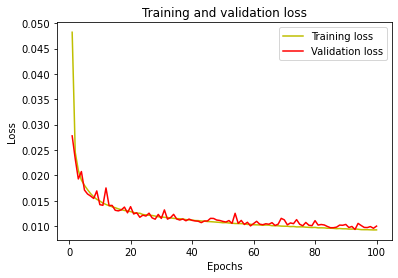

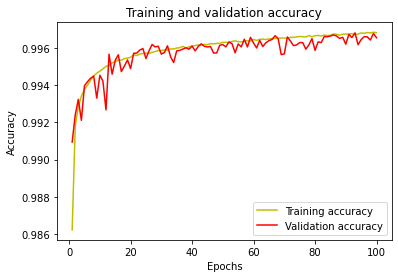

In [25]:
history_model = model_history

#plot the training and validation accuracy and loss at each epoch
loss = history_model.history['loss']
val_loss = history_model.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = history_model.history['accuracy']
#acc = history.history['accuracy']
val_acc = history_model.history['val_accuracy']
#val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'y', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()




In [26]:

predictions1=model.predict(X_test_transformed)
predictions1 = predictions1.argmax(axis=-1)
y_test=y_test.argmax(axis=-1)
accuracy_model1=accuracy_score(y_test,predictions1)
print("The accuray after the first classifier (4 classes)is: ")
print(accuracy_model1)
cm0=confusion_matrix(y_test,predictions1)
cm0





The accuray after the first classifier (4 classes)is: 
0.9965262183937277


array([[151668,      0,      0,      0,      0,      9,      0,      9,
            28,     46,      0,    119,      3,     53],
       [     0,    195,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0],
       [     0,      0,    376,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0],
       [     0,      0,      0,     28,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0],
       [     0,      0,      0,      0,      6,      0,      0,      0,
             0,      0,      0,      0,      0,      0],
       [    13,      0,      0,      0,      0,    237,      0,      0,
             0,      0,      0,      0,      0,      0],
       [     0,      0,      0,      0,      0,      0,    959,      0,
             0,      0,      0,      0,      0,      0],
       [    21,      0,      0,      0,      0,      0,      0,     37,
             0,      0,  

In [27]:
classes=['Normal', 'Deauth', 'Disas', '(Re)Assoc',
                            'RogueAP', 'Krack', 'Kr00k',
                            'SSH', 'Botnet', 'Malware', 'SQL_Injection',
                            'SSDP','Evil_Twin', 'Website_spoofing']

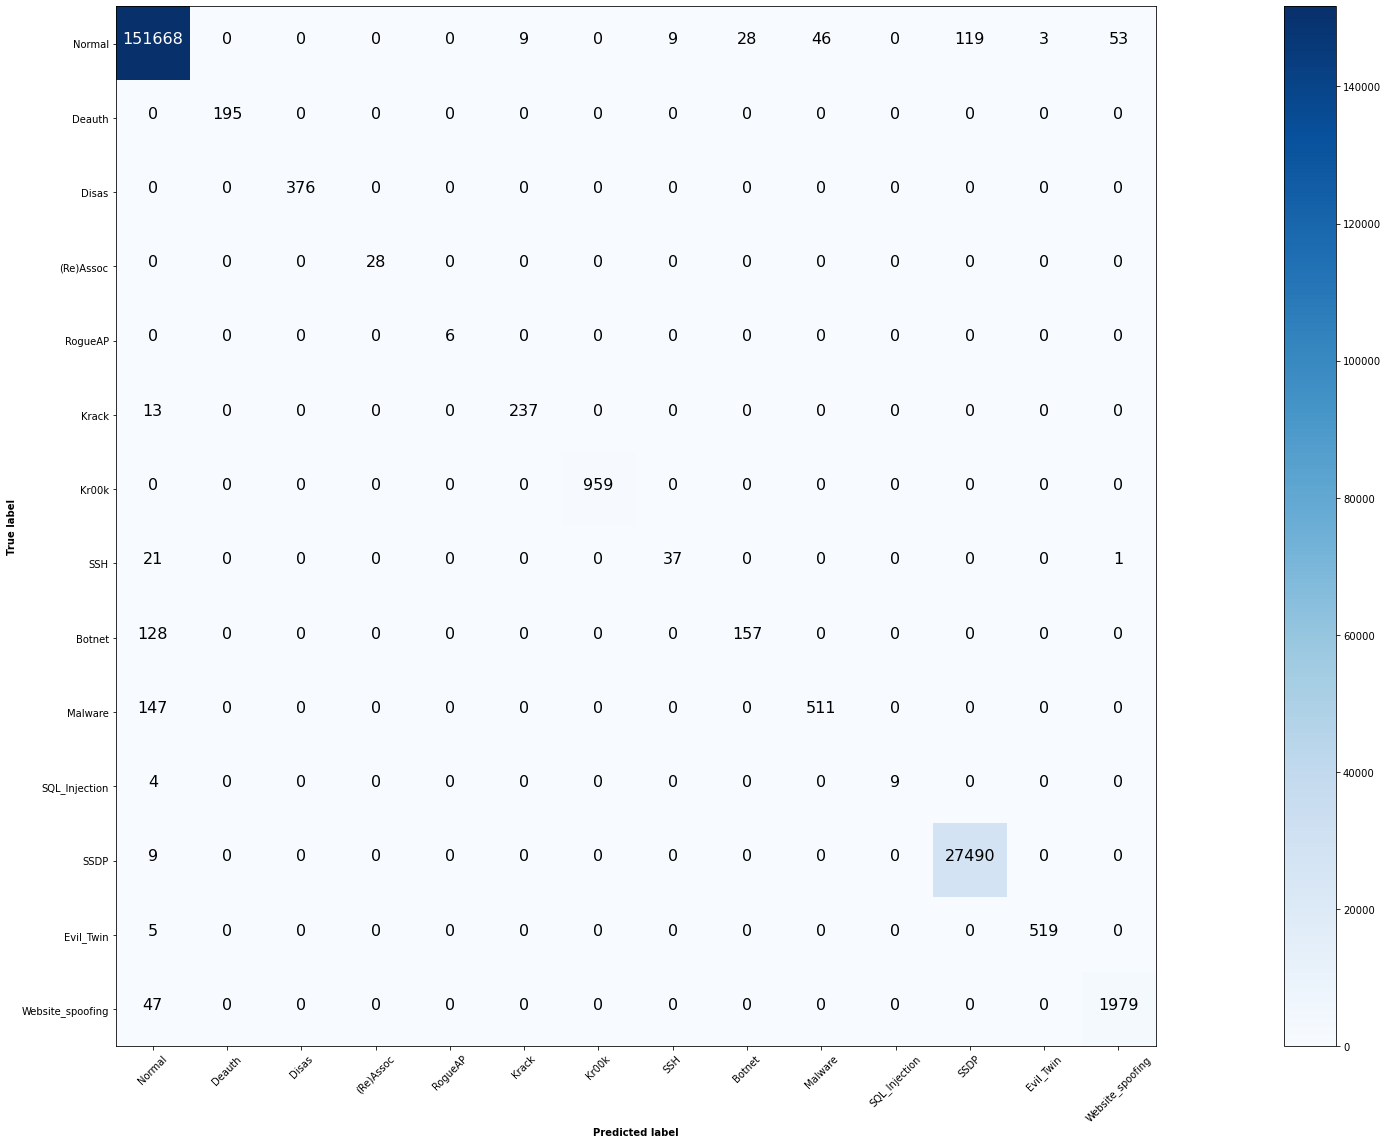

In [28]:
fig = plt.figure(figsize=(36,16))
plt.imshow(cm0, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

fmt = 'd'
np.set_printoptions(precision=2)
thresh = cm0.max() / 2.
for i, j in itertools.product(range(cm0.shape[0]), range(cm0.shape[1])):
    plt.text(j, i, format(cm0[i, j], fmt), size=16,
             horizontalalignment="center", color="white" if cm0[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label', fontweight='bold')
    plt.xlabel('Predicted label', fontweight='bold')
   
plt.show()
fig.savefig('confusion_matrix_4_classes_2.png',dpi=600)



In [29]:
cr0 = classification_report(y_test, predictions1, target_names=classes)
print(cr0)
accuracy_0 = accuracy_score(y_test, predictions1)*100
print("The accuray after the first classifier (4 classes)is: ",accuracy_0,"%")




                  precision    recall  f1-score   support

          Normal       1.00      1.00      1.00    151935
          Deauth       1.00      1.00      1.00       195
           Disas       1.00      1.00      1.00       376
       (Re)Assoc       1.00      1.00      1.00        28
         RogueAP       1.00      1.00      1.00         6
           Krack       0.96      0.95      0.96       250
           Kr00k       1.00      1.00      1.00       959
             SSH       0.80      0.63      0.70        59
          Botnet       0.85      0.55      0.67       285
         Malware       0.92      0.78      0.84       658
   SQL_Injection       1.00      0.69      0.82        13
            SSDP       1.00      1.00      1.00     27499
       Evil_Twin       0.99      0.99      0.99       524
Website_spoofing       0.97      0.98      0.98      2026

        accuracy                           1.00    184813
       macro avg       0.96      0.90      0.93    184813
    weighted

In [30]:
#from keras_visualizer import visualizer 
#visualizer(model, format='png', view=True)


ModuleNotFoundError: No module named 'keras_visualizer'

In [ ]:
from operator import truediv
def AA_andEachClassAccuracy(confusion_matrix):
    counter = confusion_matrix.shape[0]
    list_diag = np.diag(confusion_matrix)
    list_raw_sum = np.sum(confusion_matrix, axis=1)
    each_acc = np.nan_to_num(truediv(list_diag, list_raw_sum))
    average_acc = np.mean(each_acc)
    return each_acc, average_acc

In [ ]:
each_acc, av_acc=AA_andEachClassAccuracy(cm0)

In [ ]:
each_acc